In [1]:
import swarms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('paper')
from swarms import MMOON, MJUP, RJUP, AU, REARTH, MEARTH, PC, MSUN, LSUN, YEAR, MICRON, KM, GCC

In [2]:
%%time

Dc = 100*KM
rho = 1*GCC
eta = 0.3
Dt = 100 # m
fQ = 5
age = 7.5e6*YEAR
Mstar = 0.5*MSUN
Mp = MJUP

star = swarms.Star((Mstar/MSUN)**4*LSUN, Mstar, 3600, d=55*PC)
NM0 = 4
Na = 100
M0s = np.logspace(0, -6, NM0)*MEARTH#[0.1, 0.01, 0.001, 0.0001]
avals = np.logspace(np.log10(1), np.log10(500), Na)*AU
M = np.zeros((NM0, Na))
C = np.zeros((NM0, Na))
aopt = np.zeros(NM0)
for i, M0 in enumerate(M0s):    
    for j, a in enumerate(avals):
        planet = swarms.Planet(star, M=Mp , a=a)
        swarm = swarms.CollSwarm(star, planet, M0=M0, Dt=Dt, Dmax=Dc, eta=eta, rho=rho, fQ=fQ, age=age)
        M[i][j] = swarm.computeMtot()/MEARTH
        C[i][j] = swarm.computeCRscat()
        aopt[i] = swarm.computeaopt()

CPU times: user 7.39 s, sys: 501 ms, total: 7.89 s
Wall time: 7.89 s


/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


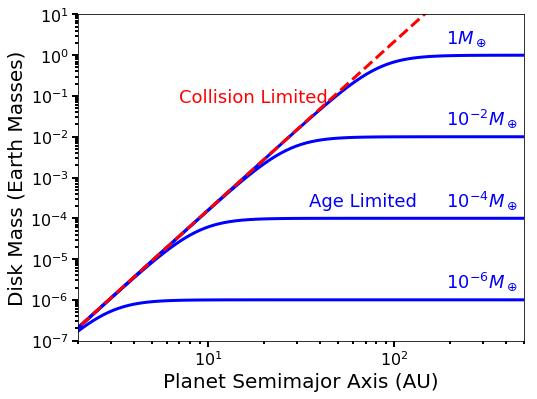

In [3]:
fig, ax = plt.subplots(figsize=(8,6))

for i, M0 in enumerate(M0s):
    ax.loglog(avals/AU, M[i,:], c='b', label=r"${0} M_\oplus$".format(M0))
    
approx = M0s[0]/MEARTH*(avals/aopt[0])**4.13
ax.loglog(avals/AU, approx, 'r--')
ax.text(7, 7.e-2, "Collision Limited", color='r', fontsize=18)
ax.text(35, 2e-4, "Age Limited", color='b', fontsize=18)
ax.text(190, 2, r"$1 M_\oplus$", color='b', fontsize=18)
ax.text(190, 2e-2, r"$10^{-2} M_\oplus$", color='b', fontsize=18)
ax.text(190, 2e-4, r"$10^{-4} M_\oplus$", color='b', fontsize=18)
ax.text(190, 2e-6, r"$10^{-6} M_\oplus$", color='b', fontsize=18)
ax.set_ylim([1e-7, 10])
ax.set_xlim([2, 500])
ax.set_xlabel('Planet Semimajor Axis (AU)')
ax.set_ylabel('Disk Mass (Earth Masses)')
fig.savefig('massvsseparation.pdf', bbox_inches='tight')

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


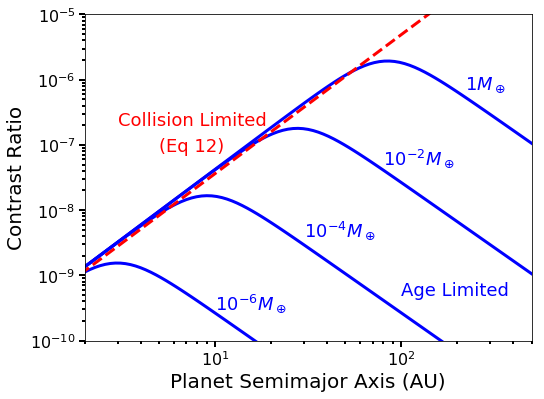

In [4]:
fig, ax = plt.subplots(figsize=(8,6))

for i, M0 in enumerate(M0s):
    ax.loglog(avals/AU, C[i,:], c='b', label=r"${0} M_\oplus$".format(M0))
    
approx = 3.3e-6*(avals/aopt[0])**2.13
ax.loglog(avals/AU, approx, 'r--')
ax.text(3, 2.e-7, "Collision Limited", color='r', fontsize=18)
ax.text(5, 8.e-8, "(Eq 12)", color='r', fontsize=18)
ax.text(100, 5e-10, "Age Limited", color='b', fontsize=18)
ax.text(220, 7.e-7, r"$1 M_\oplus$", color='b', fontsize=18)
ax.text(80, 5.e-8, r"$10^{-2} M_\oplus$", color='b', fontsize=18)
ax.text(30, 4.e-9, r"$10^{-4} M_\oplus$", color='b', fontsize=18)
ax.text(10, 3.e-10, r"$10^{-6} M_\oplus$", color='b', fontsize=18)
ax.set_ylim([1e-10, 1e-5])
ax.set_xlim([2, 500])
ax.set_xlabel('Planet Semimajor Axis (AU)')
ax.set_ylabel('Contrast Ratio')
fig.savefig('CRvsseparation.pdf', bbox_inches='tight')